In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score 

from sklearn import preprocessing


In [26]:
mydata = pd.read_csv('D:\Internship\Project\Bank_Personal_Loan_Modelling.csv')
mydata.head()



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [27]:
personal_loan = mydata['Personal Loan']
mydata.drop(['Personal Loan'], axis=1, inplace = True)
mydata['Personal Loan'] = personal_loan
mydata.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [28]:
rows_count, columns_count = mydata.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 5000
Total Number of columns : 14


In [29]:
mydata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [30]:
mydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [31]:
mydata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [32]:
mydata.isnull().values.any()


False

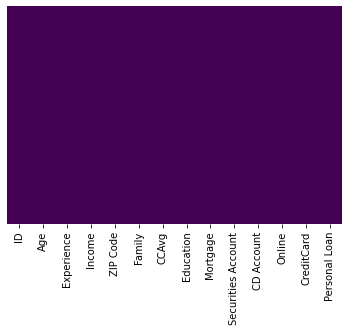

In [35]:
sns.heatmap(mydata.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [37]:
mydata.nunique()


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

In [38]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [39]:
mydata_transpose = mydata.describe().T
mydata_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Securities Account,0.0,0.00,0.0,0.00,1.0


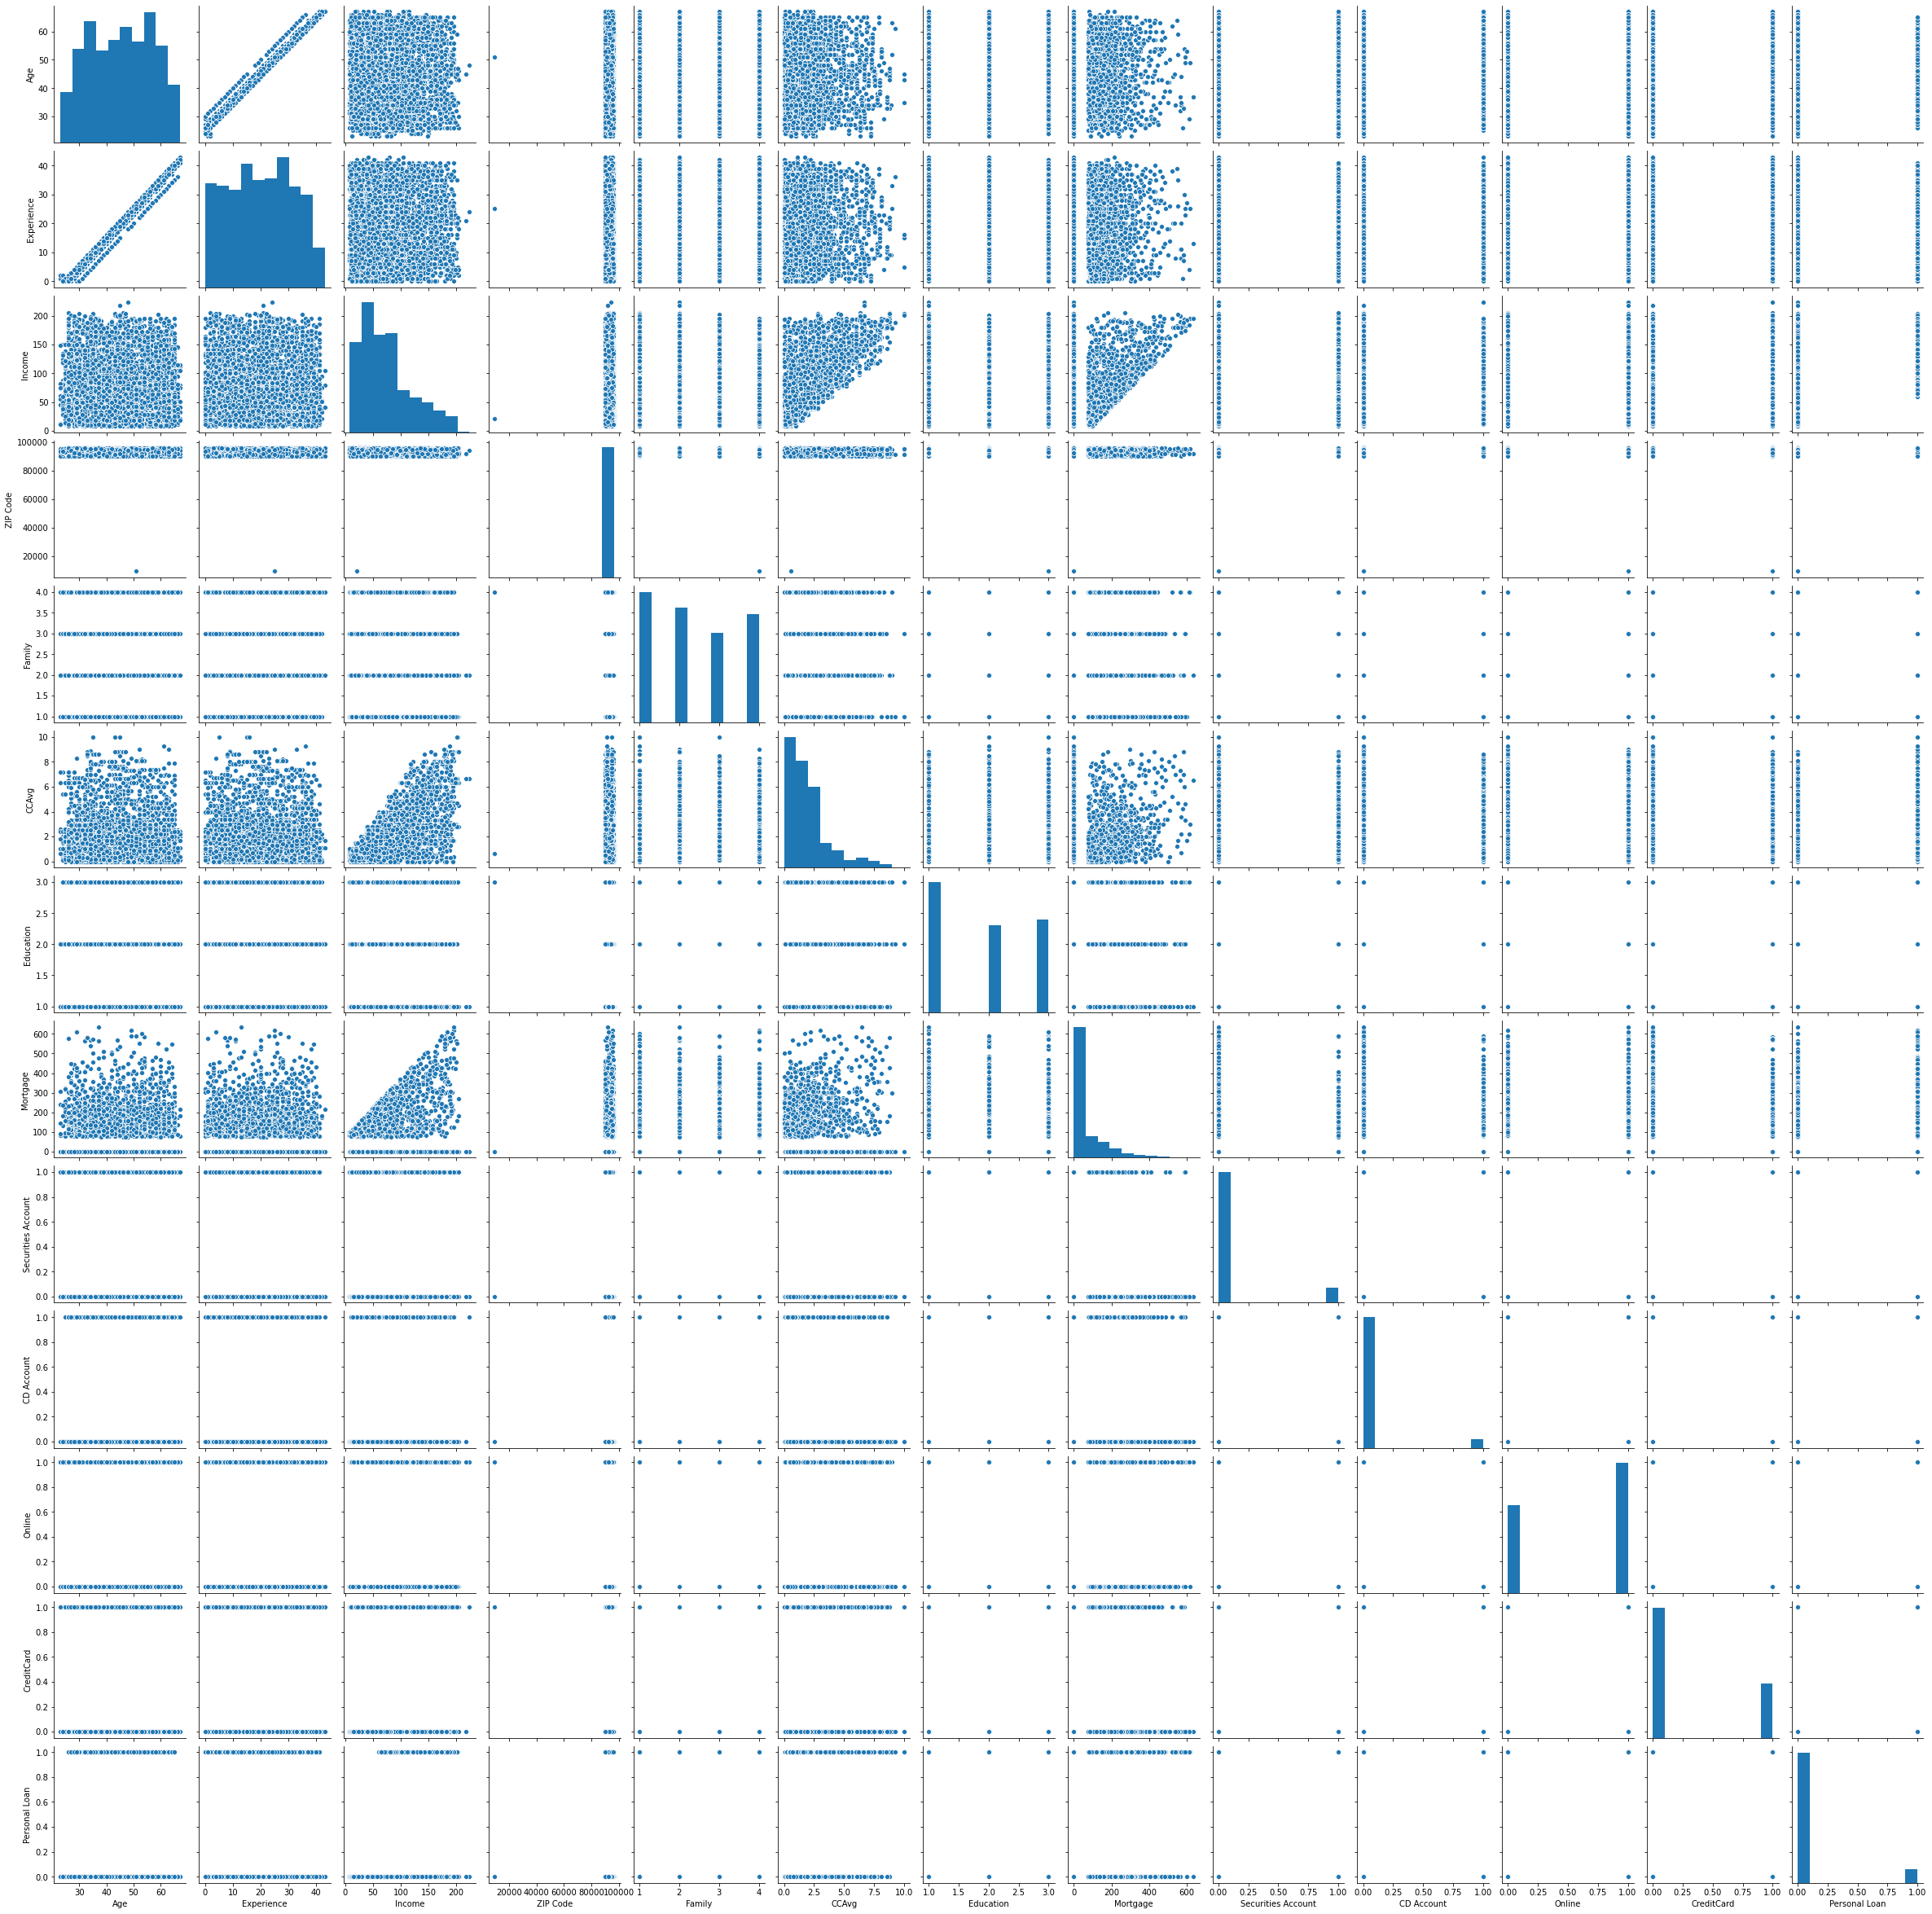

In [81]:
sns.pairplot(mydata.iloc[:,1:])

In [46]:
mydata[mydata['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [47]:
mydata[mydata['Experience'] < 0]['Experience'].count()

52

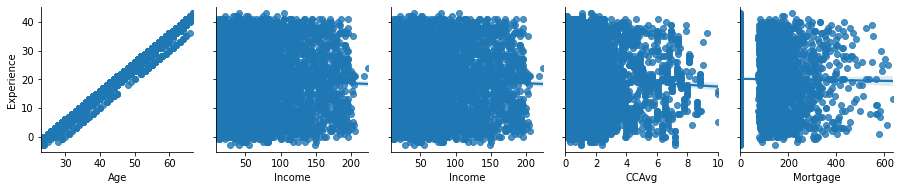

In [48]:
quantitiveVar = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(mydata, y_vars = 'Experience', x_vars = quantitiveVar)
expGrid.map(sns.regplot)

In [51]:
mydata_Possitive_Experience = mydata[mydata['Experience'] > 0]
mydata_Negative_Experience =  mydata[mydata['Experience'] < 0]
mydata_Negative_Experience_List = mydata_Negative_Experience['ID'].tolist()

for id in mydata_Negative_Experience_List:
    age_values = mydata.loc[np.where(mydata['ID']==id)]["Age"].tolist()[0]
    education_values = mydata.loc[np.where(mydata['ID']==id)]["Education"].tolist()[0]
    possitive_Experience_Filtered = mydata_Possitive_Experience[(mydata_Possitive_Experience['Age'] == age_values) & (mydata_Possitive_Experience['Education'] == education_values)]
    if possitive_Experience_Filtered.empty :
        negative_Experience_Filtered = mydata_Negative_Experience[(mydata_Negative_Experience['Age'] == age_values) & (mydata_Negative_Experience['Education'] == education_values)]
        exp = round(negative_Experience_Filtered['Experience'].median())
    else:
        exp = round(possitive_Experience_Filtered['Experience'].median())
    mydata.loc[mydata.loc[np.where(mydata['ID']==id)].index, 'Experience'] = abs(exp)
    

In [52]:
mydata[mydata['Experience'] < 0]['Experience'].count()


0

In [53]:
mydata.Experience.describe()

count    5000.000000
mean       20.134800
std        11.414863
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

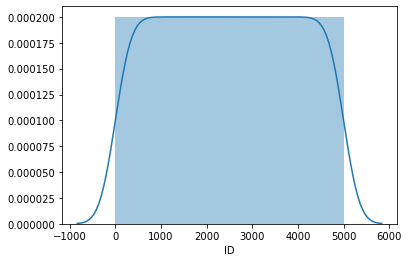

In [54]:
sns.distplot(mydata['ID'])

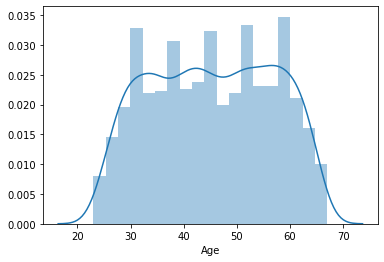

In [55]:
sns.distplot(mydata['Age'])

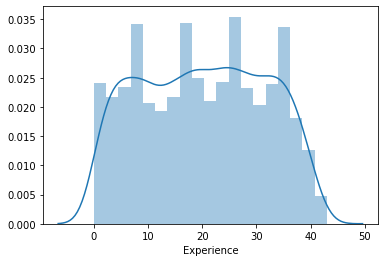

In [56]:
sns.distplot(mydata['Experience'])

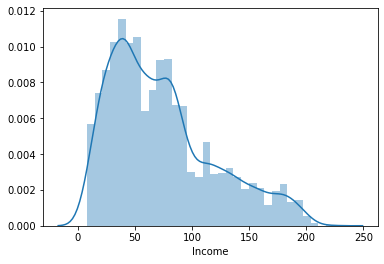

In [57]:
sns.distplot(mydata['Income'])

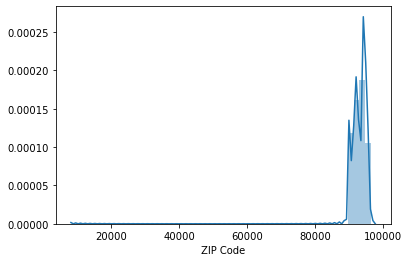

In [58]:
sns.distplot(mydata['ZIP Code'])

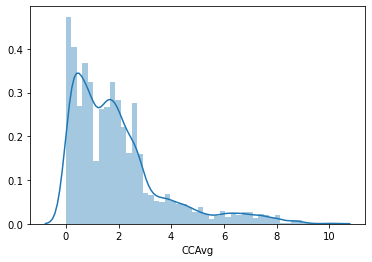

In [59]:
sns.distplot(mydata['CCAvg'])

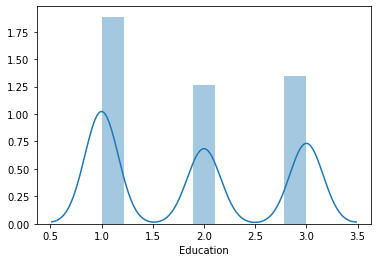

In [60]:
sns.distplot(mydata['Education'])

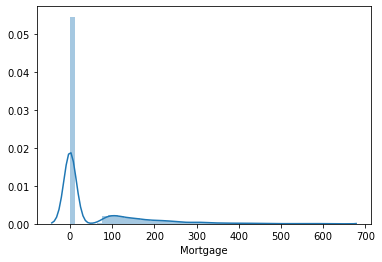

In [61]:
sns.distplot(mydata['Mortgage'])

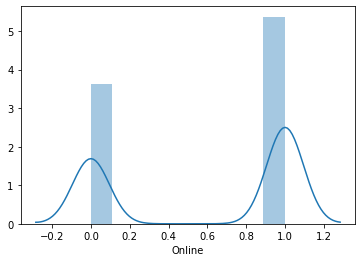

In [62]:
sns.distplot(mydata['Online'])

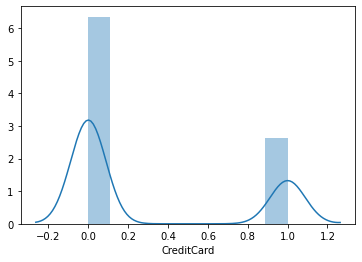

In [63]:
sns.distplot(mydata['CreditCard'])

In [64]:

loan_counts = pd.DataFrame(mydata["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


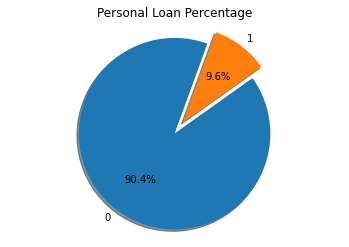

In [65]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

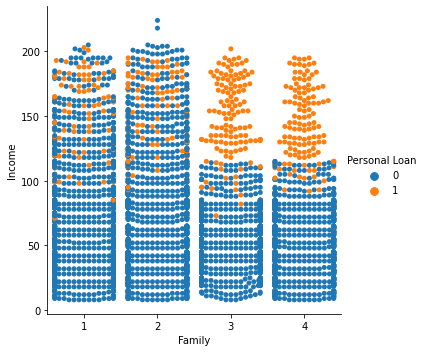

In [67]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = mydata, kind='swarm')

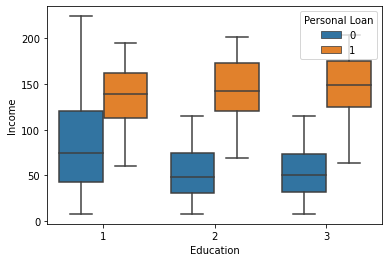

In [68]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = mydata)

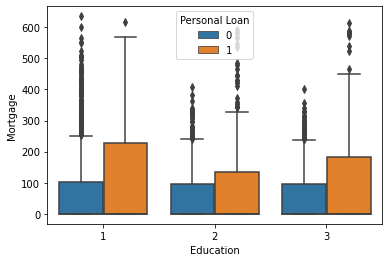

In [69]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=mydata)

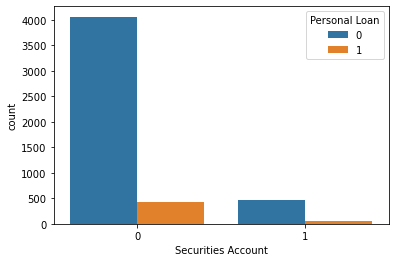

In [70]:
sns.countplot(x="Securities Account", data=mydata,hue="Personal Loan")

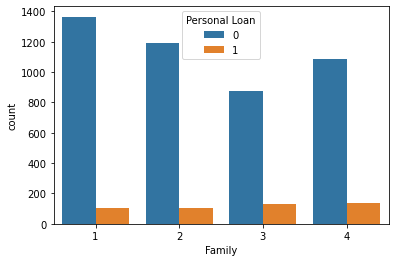

In [71]:
sns.countplot(x='Family',data=mydata,hue='Personal Loan')

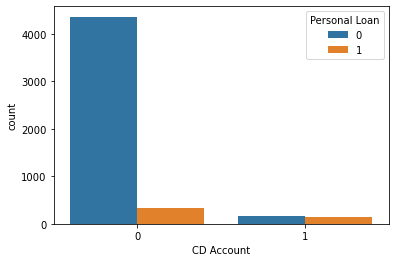

In [72]:
sns.countplot(x='CD Account',data=mydata,hue='Personal Loan')

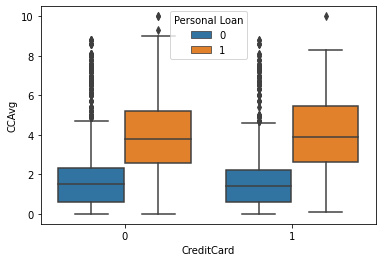

In [73]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=mydata)

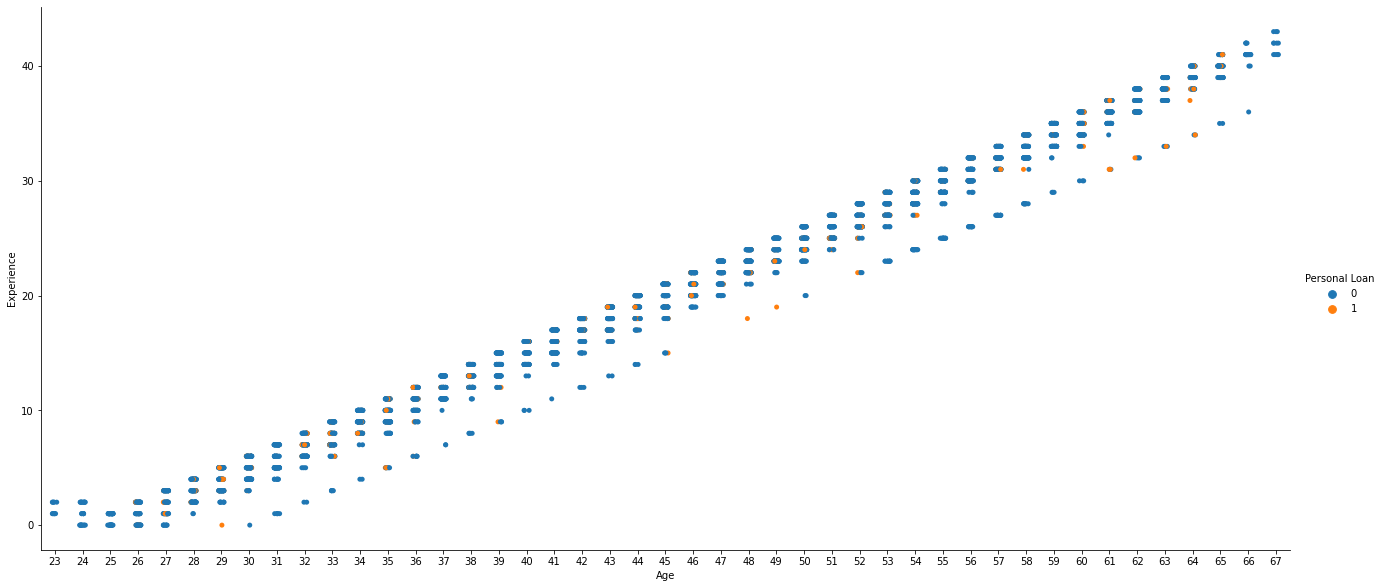

In [74]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = mydata, height=8.27, aspect=11/5)

Text(0.5, 1.0, 'CCAvg Distribution')

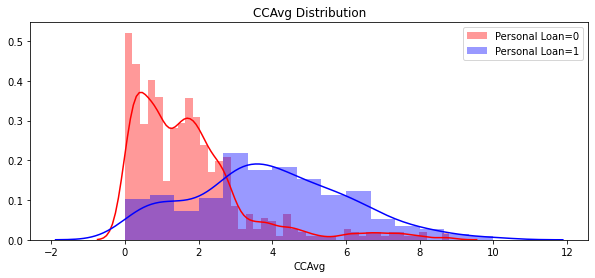

In [75]:
plt.figure(figsize=(10,4))
sns.distplot(mydata[mydata["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(mydata[mydata["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

In [76]:
print('Credit card spending of Non-Loan customers: ',mydata[mydata['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', mydata[mydata['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Text(0.5, 1.0, 'Income Distribution')

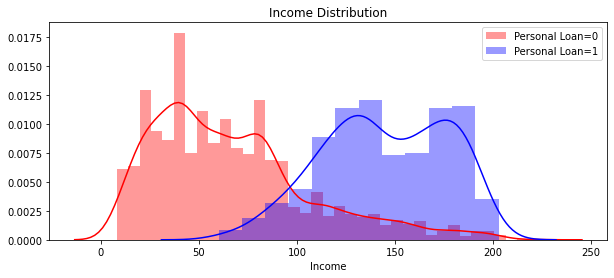

In [78]:
plt.figure(figsize=(10,4))
sns.distplot(mydata[mydata["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(mydata[mydata["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

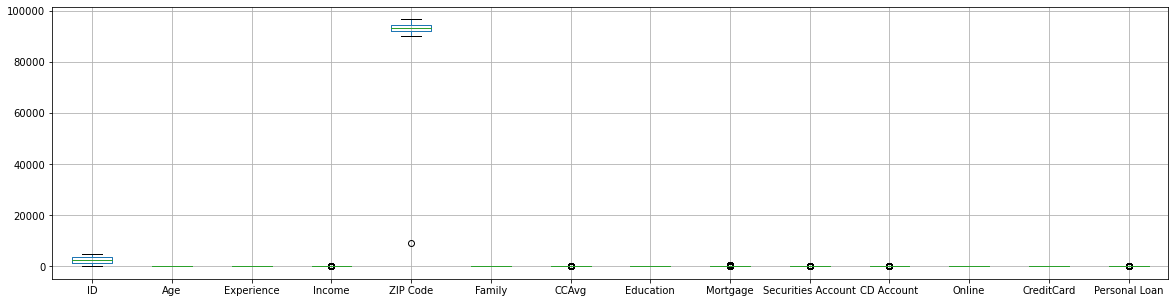

In [79]:
mydata.boxplot(return_type='axes', figsize=(20,5))

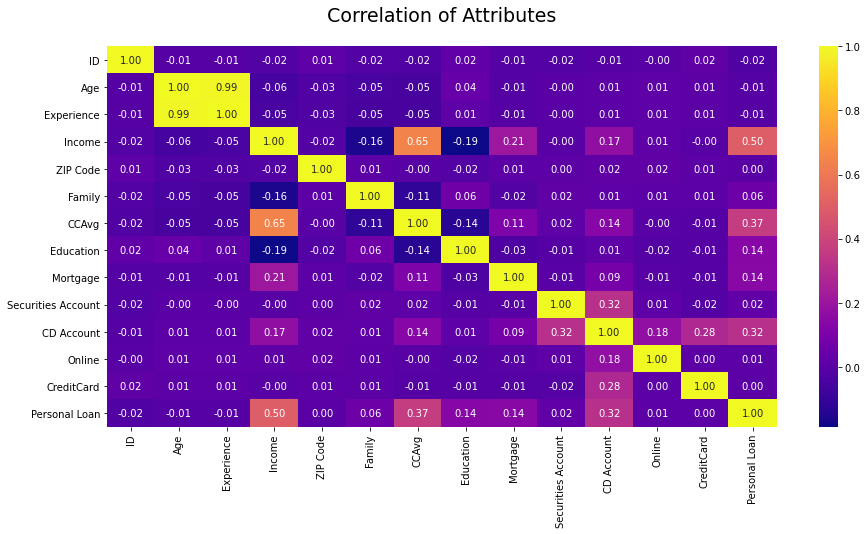

In [80]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(mydata.corr(), cmap='plasma',annot=True, fmt='.2f')